In [ ]:
import sys
sys.path.append('ipfnlite/')
sys.path.append('/afs/ipp/aug/ads-diags/common/python/lib/')
from getsig import getsig
from closest import closest
from get_ric_avr_profile import get_ric_avr_profile
import matplotlib.pyplot as plt
import dd
import kk_abock
import numpy as np
#plt.style.use('./Styles/darklab.mplstyle')

# Plotting parameters

In [9]:
# Set up the colors
prop_cycle = plt.rcParams['axes.prop_cycle']
color_values = prop_cycle.by_key()['color']
color_names = ["bl", "or", "gn", "rd", "vlt", "brwn", "mg", "gr", "lgn", "cn"]

colors = {}
for ii, color in enumerate(color_names):
    colors.update({color: color_values[ii]})

In [10]:
# Set up the diagnostic plotting styles
diag_plt_style = {
    "RIC_ant1":{"color":colors["bl"], "marker":"^", "markerfacecolor":"white", "label":"RIC top.", "linestyle":"-"},
    "RIC_ant4":{"color":colors["or"], "marker":"o", "markerfacecolor":"white", "label":"RIC mid.", "linestyle":"-"},
    "RIC_ant8":{"color":colors["gn"], "marker":"D", "markerfacecolor":"white", "label":"RIC bot.", "linestyle":"-"},
    "LiB":{"color":colors["vlt"], "marker":"p", "markerfacecolor":"white", "label":"LiB", "linestyle":"-"}
}

In [11]:
lim_pos_Rz = {
    "RIC_ant1" : {"R":2.137, "z": 0.442},
    "RIC_ant4" : {"R":2.202, "z": 0.03},
    "RIC_ant8" : {"R":2.054, "z": -0.42}
}

# Reading data

In [12]:
shotnr = 37750
antenna = 1  # 1 - topplane, 4 - midplane, 8 - bottomplane 

# read the profiles
diag_name = "RIC_ant{}".format(str(antenna))
data = {diag_name:{}}
shotfile = getsig(shotnr, "RIC", "Ne_Ant1")
data[diag_name]["rhop"] = shotfile.area
data[diag_name]["ne"] = shotfile.data
data[diag_name]["time"] = shotfile.time

# read the equilibrium
eq = kk_abock.kk()
eq.Open(shotnr, diag='EQH')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)


True

# Plotting individual profiles

Profile with ICRF limiter position

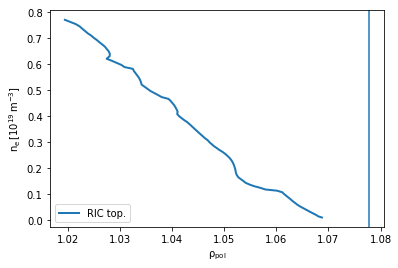

In [30]:
time = 2.1

tind = closest(data[diag_name]["time"], time)

rhop_limiter = eq.Rz_to_rhopol(time, lim_pos_Rz[diag_name]["R"], lim_pos_Rz[diag_name]["z"])

plt.plot(
    data[diag_name]["rhop"][tind, :], 
    data[diag_name]["ne"][tind, :]*1e-19, 
    label=diag_plt_style[diag_name]["label"], lw=2, 
    c=diag_plt_style[diag_name]["color"],
    linestyle=diag_plt_style[diag_name]["linestyle"])
plt.axvline(
    rhop_limiter,
    c=diag_plt_style[diag_name]["color"]
)
plt.xlabel(r'$\mathrm{\rho_{pol}}$')
plt.ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
plt.legend()
plt.show()

# Plotting averaged profiles from a time interval

In [16]:
time_start = 2.1
time_end = 2.2

tind_start = closest(data[diag_name]["time"], time_start)
tind_end = closest(data[diag_name]["time"], time_end)


avr_rhop, avr_ne, min_rhop, max_rhop = get_ric_avr_profile(
    data[diag_name]["rhop"][tind_start:tind_end, :],
    data[diag_name]["ne"][tind_start:tind_end, :], 
    num=20, ne_min=0
)

min_rhop, max_rhop can be considered as error bars

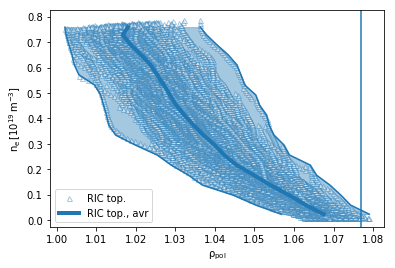

In [31]:
rhop_limiter = eq.Rz_to_rhopol(
    np.average(data[diag_name]["time"][tind_start:tind_end]), 
    lim_pos_Rz[diag_name]["R"], 
    lim_pos_Rz[diag_name]["z"]
)

plt.plot(
    data[diag_name]["rhop"][tind_start:tind_end, :],
    data[diag_name]["ne"][tind_start:tind_end, :]*1e-19,
    lw=2, linestyle="", 
    c=diag_plt_style[diag_name]["color"],
    marker=diag_plt_style[diag_name]["marker"], 
    markerfacecolor=diag_plt_style[diag_name]["markerfacecolor"], 
    markersize=5.0, zorder=1, alpha=0.4
)

plt.plot(
    data[diag_name]["rhop"][tind_start:tind_end, :][0],
    data[diag_name]["ne"][tind_start:tind_end, :][0]*1e-19,
    label=diag_plt_style[diag_name]["label"],
    lw=2, linestyle="", 
    c=diag_plt_style[diag_name]["color"],
    marker=diag_plt_style[diag_name]["marker"], 
    markerfacecolor=diag_plt_style[diag_name]["markerfacecolor"], 
    markersize=5.0, zorder=1, alpha=0.4
)

plt.plot(
    avr_rhop, avr_ne*1e-19,
    label="{}, avr".format(diag_plt_style[diag_name]["label"]), 
    lw=4, 
    c=diag_plt_style[diag_name]["color"],
    markersize=5.0, linestyle="-")

plt.fill_betweenx(avr_ne*1e-19, min_rhop, max_rhop, 
                color=diag_plt_style[diag_name]["color"],
                alpha=0.4)
plt.plot(min_rhop, avr_ne*1e-19, color=diag_plt_style[diag_name]["color"])
plt.plot(max_rhop, avr_ne*1e-19, color=diag_plt_style[diag_name]["color"])
plt.axvline(
    rhop_limiter,
    c=diag_plt_style[diag_name]["color"]
)
plt.xlabel(r'$\mathrm{\rho_{pol}}$')
plt.ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
plt.legend()
plt.show()